#PLEASE SEE BELOW FOR TASK QUESTIONS

#Remarks

The code snippets related to SELENIUM below do not work on COLAB, please copy and paste them on an IDE such as SPYDER.
<br><br><br>

Some lines within the scraping script are necessary when starting it from my computer because opening the root URL returns the website with language and country settings from my computer's location and information (specifically italian in Germany).
<br><br><br>

Some campaigns are organized by an individual, some are organized by nonprofits, in which case there may be a "learn more" button, but the problem is that they're not apparently standardized according to a css selector, which implies the xpath as the most straightforward solution to gather the nested information such as location or organizer's name.

Another structure occurring quite often is "organizer and beneficiary", implying that the main organizer is collecting funds on behalf of a third party, which could be another individual or a charity, and some fundraisers are organized by a team of individuals, possibly also following the "organizer and beneficiary" pattern.

This is what led me to utilize SELENIUM in order to cover the possible non standardized structures behind the website.
<br><br><br>

All the columns with two possible values have been set as dummy variables, below it's possible to have a quick view into the related values:

*   Entity: 1 -> Registered nonprofit, 0 -> Organizer;
*   Updates: 1 -> At least one update, 0 -> No updates;
*   Beneficiary: 1 -> Yes; 0 -> No
<br><br><br>

The success score for a campaign would range from 0 to 10 points and would be calculated as follows:

*   Raised at least 30% of goal: 3 points;
*   Raised at least 50% of goal: 4 points;
*   Raised at least 80% of goal: 5 points
<br>

*   Involved more than average amount of donors (corrected for outliers): 2 points
<br>

*   Raised 30% of goal in less than 1 week from creation: 1 point;
*   Raised 50% of goal in less than 1 week from creation: 2 points;
*   Raised 80% of goal in less than 1 week from creation: 3 points

Campaigns totaling 6 points or more would be classified as successful.

#Description

My approach relies on the usage of SELENIUM to mimic human behavior on a webpage, and I have used it to scrape the website for relevant information related to each of the 203 campaigns I chose to analyze.

In the first step, I use SPYDER to write the script "scrape_7744044_case2.py", which is attached to the zipped folder, in order to gather the information outlined in the task, such as campaign's title, description and so on, in addition to some other variables such as whether the fundraiser provides updates, or the amount of words of support, which are saved into an excel file either as string, in the case for example of title, or integer for the relevant dummies/numerical features, using PANDAS.

A visualization of the dataframe follows, with a brief explanation of the variables offered below.

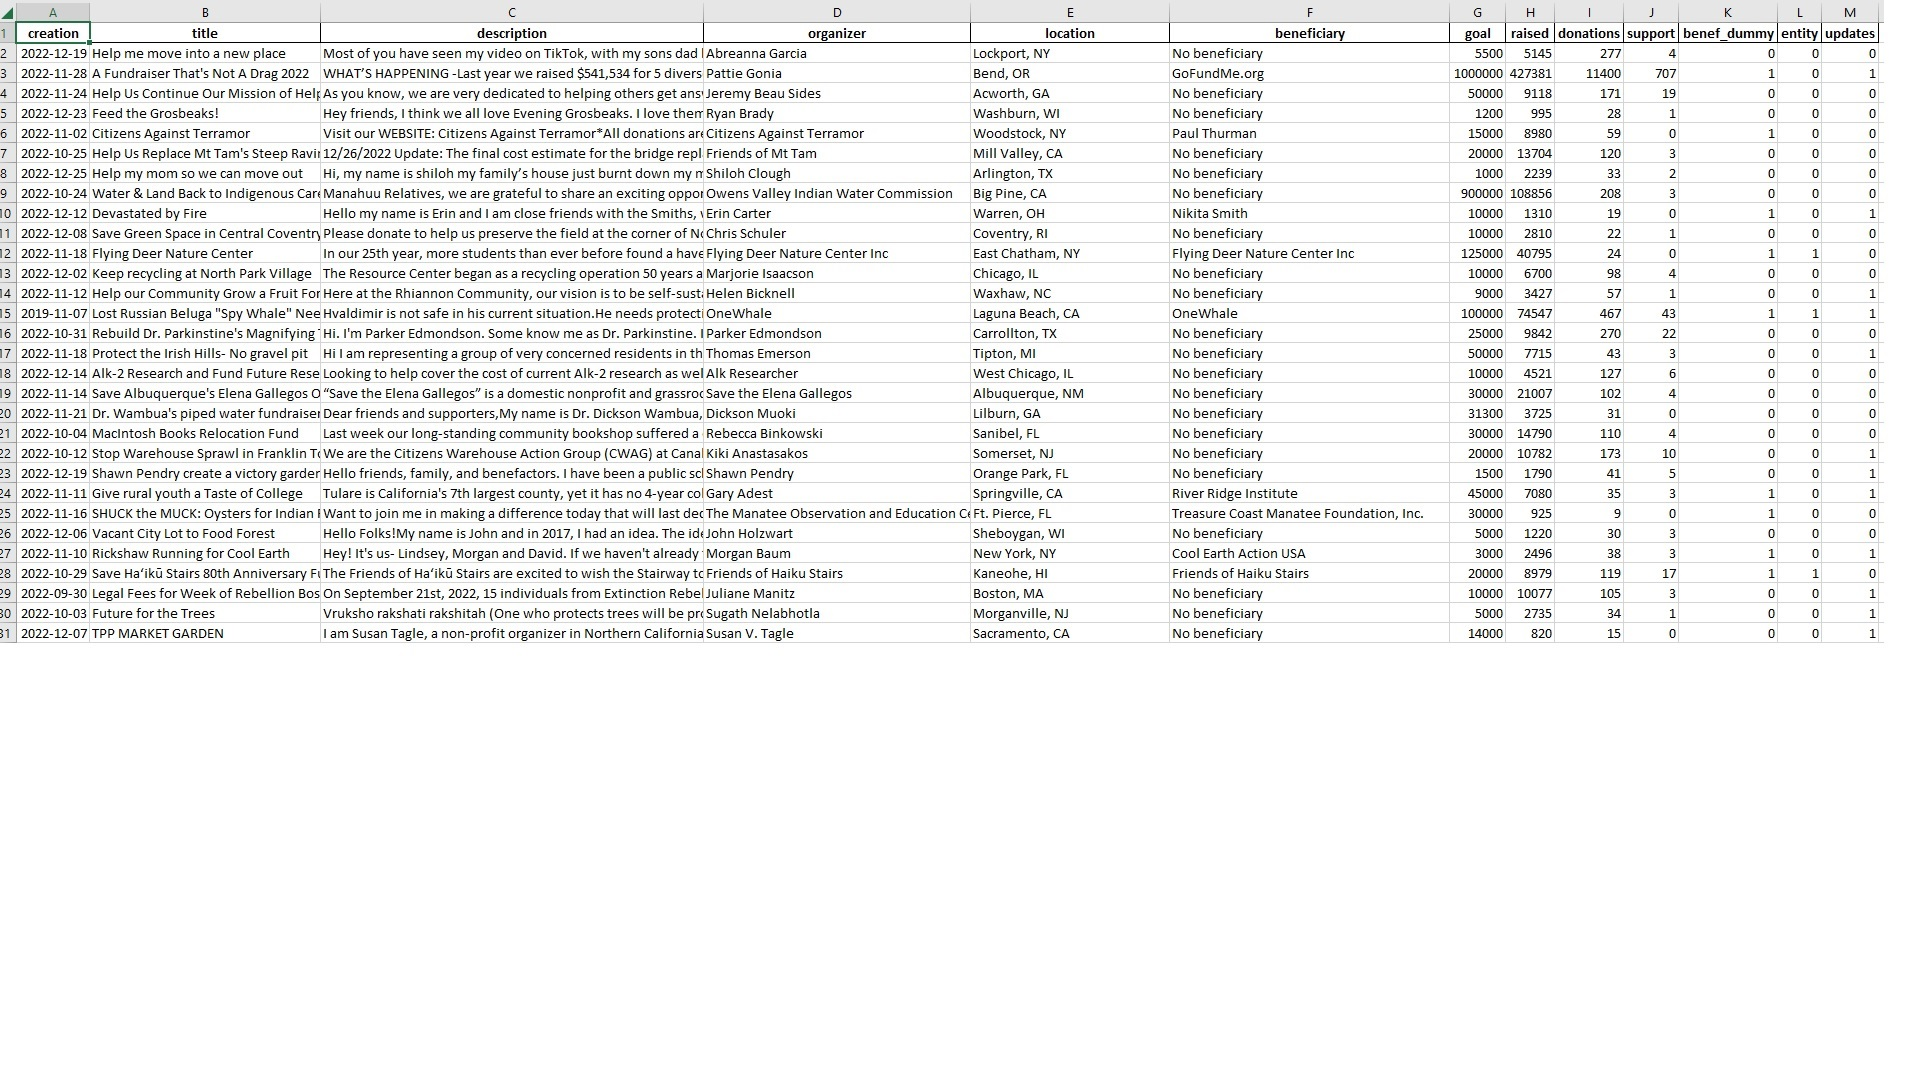

The variables contained within are:

*   creation, derived from the "Created N days ago"/"Created MONTH, DAY YEAR" string within the campaign's main page and saved as datetime, I used it for the additional donation analysis carried out in question 4;
*   title, directly extracted from the relevant field within the campaign's main page and saved as string;
*   the same holds for description, organizer, location and beneficiary;
*   goal, directly extracted from the relevant field within the campaign's main page and saved as integer;
*   the same holds for raised and donations;
*   support, derived from the "Words of support (N)" string below the description field within the campaign's main page and saved as integer, I used it for the association analysis carried out in question 6.c;
*   benef_dummy, derived from transforming the beneficiary column into a dummy variable according to what is outlined in the remarks section, and saved as integer, even though I haven't really used it, I initially thought it could have been useful;
*   entity, derived from the organizer field string within the campaign's main page as a dummy variable according to what is outlined in the remarks section, and saved as integer, I haven't used it either since only 5 campaigns had a charity as main organizer, whereas many more had a charity as beneficiary;
*   updates, derived from the "Updates (N)" string below the description field within the campaign's main page as a dummy variable according to what is outlined in the remarks section, and saved as integer, I used it to run a multivariate regression while carrying out question 6
<br><br><br>

After being able to utilize the dataset, I moved on to answer the task questions directly on the notebook, as shown below, and either by expanding the aforementioned script, or by writing a new one, defined "supp_don_7744044_case2.py", and finally I converted the notebook to HTML.

In [ ]:
%shell jupyter nbconvert --to html /content/gdrive/MyDrive/projects/dafa/EdoardoPilla_7744044_case2.ipynb

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/projects/dafa/EdoardoPilla_7744044_case2.ipynb to html
[NbConvertApp] Writing 3077488 bytes to /content/gdrive/MyDrive/projects/dafa/EdoardoPilla_7744044_case2.html


#Drawbacks

Applying the TRANSFORMERS model for sentiment analysis to the description field of the campaigns returns the error:

"The size of tensor a (890) must match the size of tensor b (512) at non-singleton dimension 1".

This happens because the model can't handle sequences of beyond 512 tokens, and this often happens for longer descriptions; a solution to this is setting the "Truncation" parameter to true while setting up the pipeline, albeit this in fact omits all the information past the 512 token mark.

Solutions offered online are "https://towardsdatascience.com/how-to-apply-transformers-to-any-length-of-text-a5601410af7f", which implies splitting the given descriptions into chunks of length lower than 512, running the classification individually for each chunk and then taking the average, but the main risk is for the model to lose the semantic sense of the whole description.

Another alternative is using LONGFORMERS, which however requires manual fine tuning of the model parameters.

For this reason, I assume in my report that the initial 512 tokens are sufficient to infer the whole text's sentiment, although this is obviously representing a limitation.
<br><br><br>

Some fundraisers, albeit contained in the environmental section, are simply trying to gather funds for personal reasons, and thus partially disrupt the analyses carried out later on in the notebook.
<br><br><br>

The simple threshold of 80% set as a success indicator doesn't contain enough information to reflect the real campaign's success, which is also impacted by how long it took the organizer to raise such amount, and by the amount of donors participating into the fundraising; such factors should be accounted for in order to return a better success score for each campaign.
<br><br><br>

The additional donation amount analysis performed for one campaign within the fourth question should be done for all campaigns in order to yield a more accurate success score, but this has not been the case because more focus should be put into the code extracting day by day donation information, since a campaign's page can have a variable amount of highlighted donations, namely those which appear in the main page and also when clicking on the "See all" button.

This implies a variable amount of duplicated entries in the list containing the newly extracted data, along with a variable amount of blank entries (for instance, the sample campaign has 5 duplicated entries because 5 donations appear in the main page, and 5 blank entries, as opposed to, for example, the campaign "Help Us Continue Our Mission of Helping Families!", which has 3 duplicated entries and 3 blank values.

If the only problem was this, a solution could be represented by the following code, which extracts the highlighted donations and uses the length of such list to remove duplicates and blank values.

In [ ]:
# shows length of elements belonging to the relevant class, so that if for instance the length is 10, there are 5 duplicates and 5 blank entries in the donations/time lists
print(len(driver.find_elements(by = By.XPATH, value = "//li[@class='o-donation-list-item']")))

Another problem, however, is that the location of duplicates and blank entries within the list isn't fixed, for example always at the bottom or top, but varies if the campaign has highlighted "Recent donation", "Top donation" and "First donation" instead of simply listing the 5 most recent ones, so that finding and removing duplicates and blank entries becomes a non trivial task.

A strategy could be characterized by checking the donation date and amount, and using this information to cancel the related duplicated value, but this could expose to the risk of deleting a different donation, made in the same day and for the same amount.
<br><br><br>

The same issue occurs when trying to investigate the association between words of support and donation amount, because the scraping algorithm relies on the same webpage structure, and this is the reason why such approach was only showcased for one fundraiser and not extended for all the 203 available URLs.

#Questions

**Browse the Top Fundraising Tips provided by the GoFundMe platform;
list and discuss the relevant information that you must gather in your
web scraping task. Where could you find this information? What other
factors do you think could contribute to fundraising success?**

GoFundMe's staff states that

*   setting an achievable goal;
*   writing a meaningful title, possibly ranging from four to eight words;
*   writing a readable and heartfelt description beyond 400 words;
*   uploading at least five pictures describing the story;
*   using social media to build a community around the campaign;
*   getting in touch with journalists to share the story in the news;
*   providing updates at least once a week, encouraging people to subscribe to them through the appropriate button;
*   adjusting the goal if momentum is larger or smaller than expected;
*   writing letters for donors

are all ways to boost the fundraiser's success.

Gathering most of the information pointed out in the previous list is easily done using selenium webdriver, after inspecting the campaign's page through the chosen browser to observe its structure.

The goal information can be extracted with the following line of code from any URL related to a specific campaign.

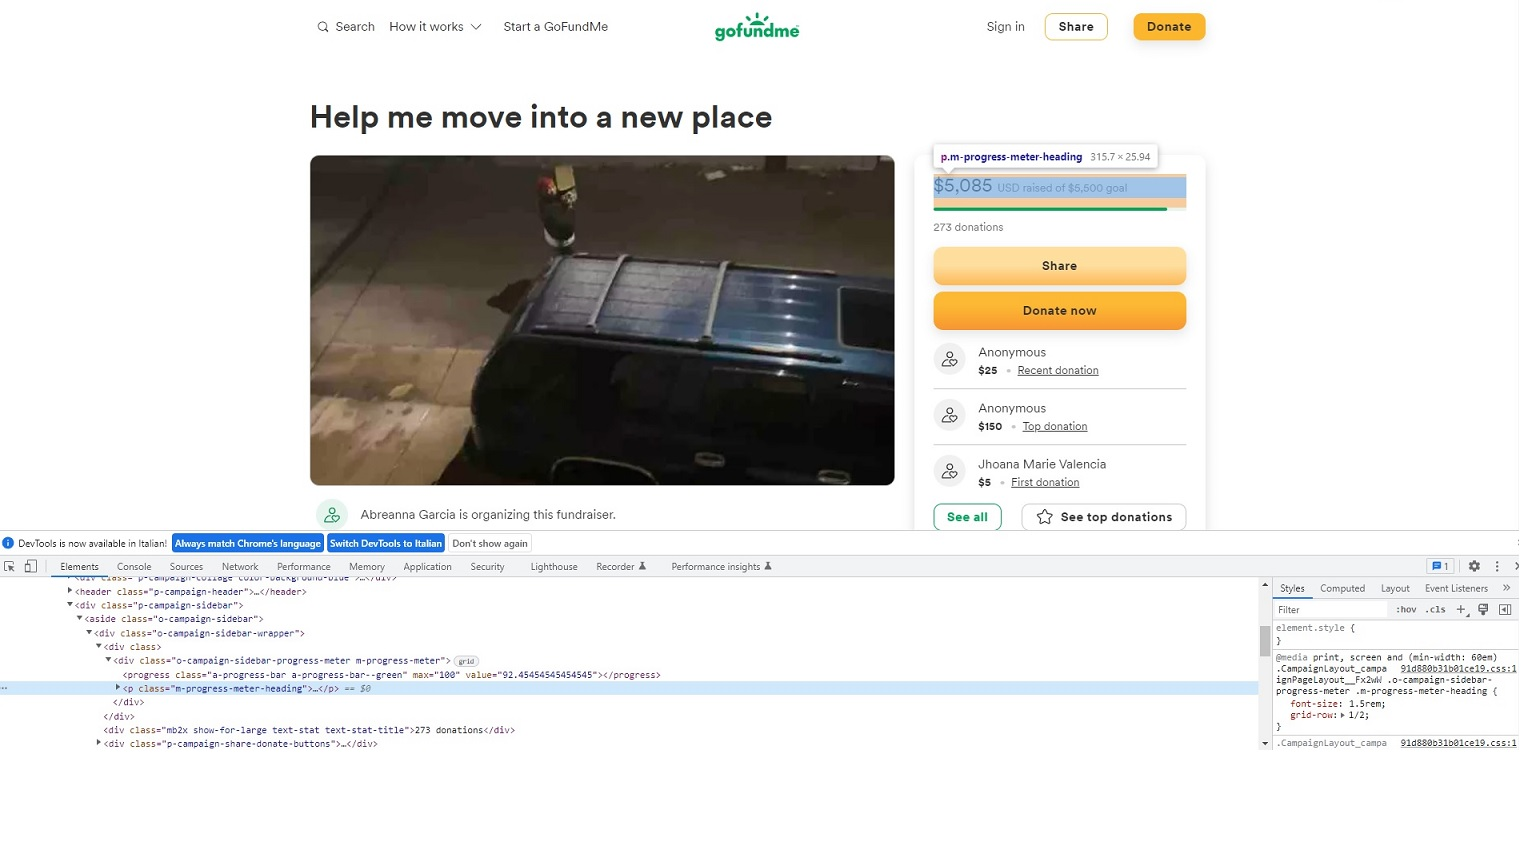

In [ ]:
# the code returns the second number in the relevant CSS selector as a string, which can then be turned into an integer by removing the comma, if present
goal = re.findall("\d+,*\d*", driver.find_element(by = By.CSS_SELECTOR,
                                                  value = ".m-progress-meter-heading").text)[1]

The same holds for the title information.

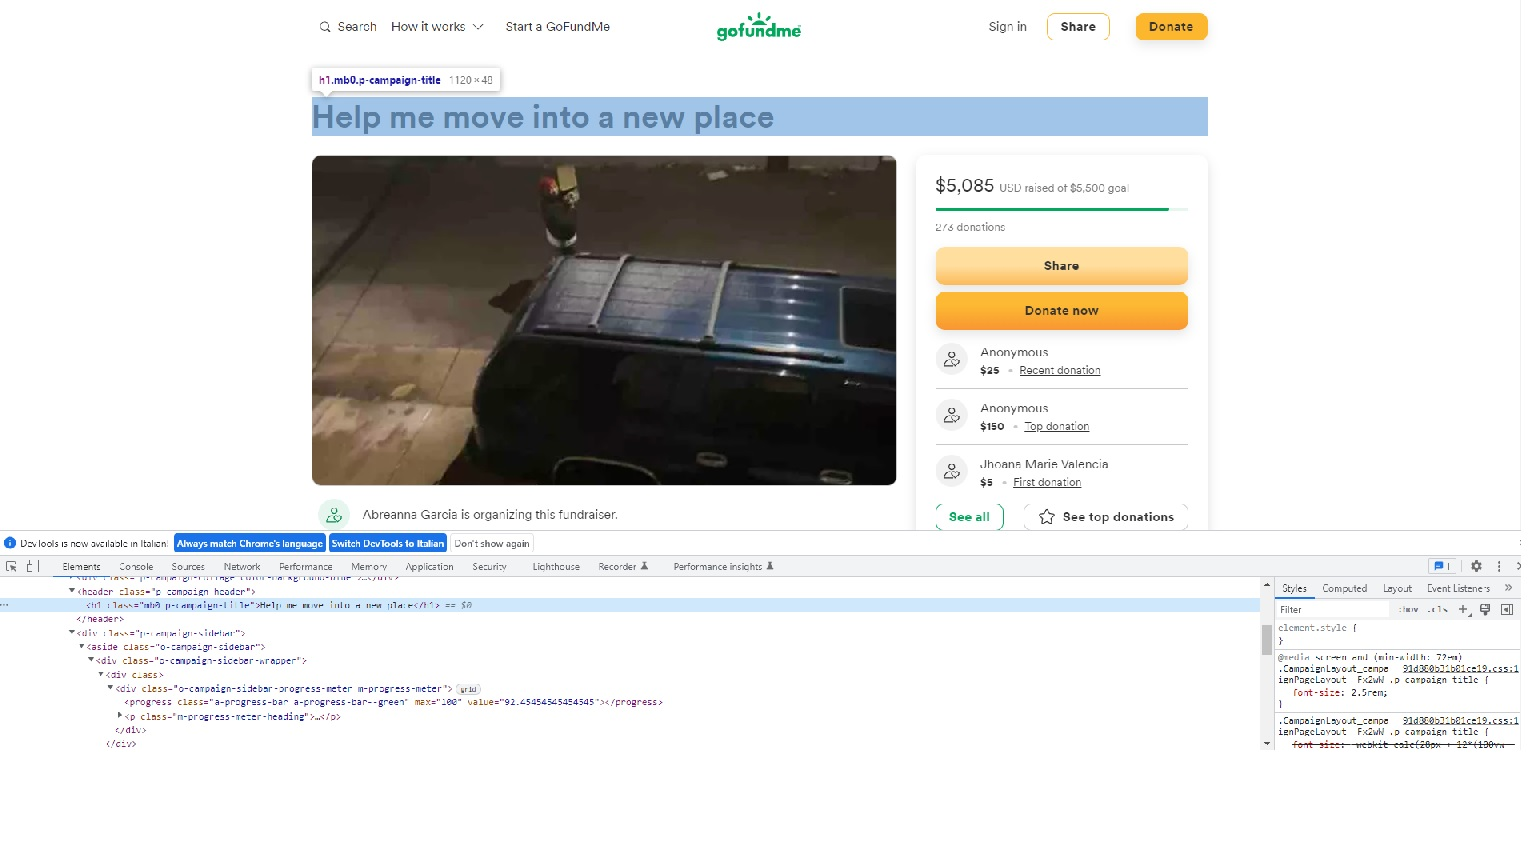

In [ ]:
# the code returns the campaign's title as a string, again using the CSS selector to latch onto the element
title = driver.find_element(by = By.CSS_SELECTOR, value = ".mb0.p-campaign-title").text

Omitting additional pictures for simplicity, information about the campaign's description, photos and updates can be extracted using the following snippets.

In [ ]:
# the code returns the campaign description as a string, without newlines for better formatting when, for instance, appended to a list or inserted as an entry in a dataframe
desc = driver.find_element(by = By.CSS_SELECTOR, value = ".o-campaign-description").text.replace("\n", "")

# the code saves the main campaign's photo as a png file in the desired path
driver.find_element(by = By.CSS_SELECTOR, value = ".a-image.a-image--background").screenshot(r"PATH\background.png")

# the code saves the photos available in the description section of the campaign as jpg, using the xpath to filter for the element which contains them (this is why /img is present), and urllib for easy saving,
# so that each image is labelled "imgnumb" where numb goes from 1 to the list's length
imgs_desc = driver.find_elements(by = By.XPATH, value = "//div[@class='o-campaign-story mt3x o-campaign-story--is-open']/img")

img_urls = []
for img in imgs_desc:
    img_urls.append(img.get_attribute("src"))

import urllib.request

numb = 1
for url in img_urls:
    urllib.request.urlretrieve(url, r"PATH\img" + str(numb) + ".jpg")
    numb += 1

# the code returns the campaign update's text as a string, without newlines for better formatting when, for instance, appended to a list or inserted as an entry in a dataframe
up_txt = driver.find_element(by = By.CSS_SELECTOR, value = ".m-update-content").text.replace("\n", "")

Other factors contributing to the campaign's success could be how emotionally appealing the aim of the fundraiser is, whether the fundraiser is held by an individual or a charity, since the latter could be attracting more donors, and the country where the fundraiser is carried out, given that GoFundMe is more widely used in some countries rather than others, as the image below shows (source: similarweb.com).

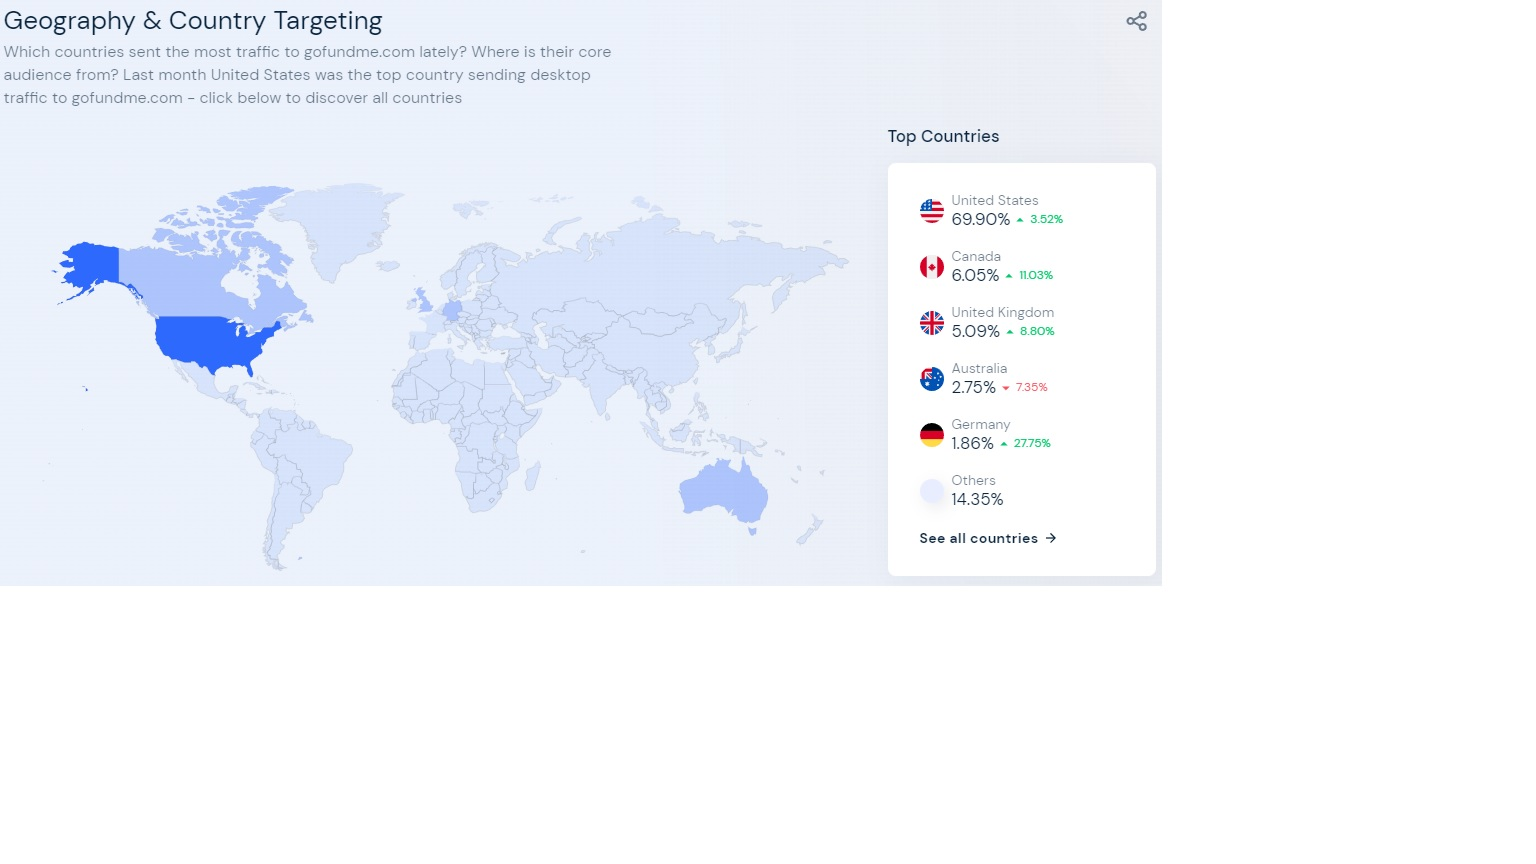

**Elaborate on your web scraping model. Assume that you want to
maintain a regular scraping of this platform for at least one year. What
is the best way to fully automatize the task? What would be the root
page? Which tools do you need? Discuss the ethical aspects of doing
such a job.**

Given that I have used selenium to mimic human behavior in order to click multiple times on the "Show more" button, I would write code to check, for example on a daily basis, the list of URLs for the chosen amount of campaigns, and compare it with the URLs coming from the new get HREF attribute, to make sure I wouldn't scrape the same page multiple times. On a more practical side, this would be manageable by using CRONTAB on LINUX or the task manager on WINDOWS, to schedule the script execution on a periodic basis.

Assuming the scraping goal would still be to extract information about environmental fundraisers, then the root page wouldn't change for me, namely the URL would still be "https://www.gofundme.com/discover/environment-fundraiser", because my code is based on this link to then search for new campaigns.

Ethically, the main focus would be not to overload the website with requests, letting the website owner know that its pages are being browsed with no bad intentions, also by providing a "User Agent" string for him or her to get in touch with the scraper, along with avoiding scraping private or sensitive data, which may potentially be available on the website.
<br><br><br>

**What is the best way to store the scraped data? Discuss the cons of
saving the data in the CSV format.**

Even though files saved in CSV format are easily accessible by multiple tools for upload and data manipulation, their formatting easily leads to issues when opening the file in excel, since a text entry could be wrongly split into several cells if it contains multiple commas; another problem is that CSV doesn't handle special characters well, and overall represents an inefficient way of accessing and saving data, compared for instance with the HDF5 format, which is a binary file format that is characterized by a higher flexibility in terms of allowed data types, and represents a viable alternative to csv, which stores plain text, especially if the data size gets large.

In this particular framework, I preferred saving the output to an excel file for better visualization, compared to saving it to a CSV file.
<br><br><br>

**What would be the best definition of campaign success? What percentage of the scraped campaigns are “successful”?**

A reasonable definition of campaign success could be reaching and overcoming the predefined goal in a timely fashion, possibly having convinced a large amount of donors to contribute, and having brought the topic to the attention of a wide audience in the meantime.

In this sense, it is possible to check the campaign success, given the data I have previously scraped, using some measures such as how close, or how far beyond the goal the raised amount has reached, taking into account the amount of time passed since the campaign's creation, potentially weighted for the goal amount, since it is plausible to think that reaching a small goal is easier than reaching a large one.

In [1]:
# link drive to colab
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [4]:
# import the needed libraries
import pandas as pd
import re

In [5]:
# read and show the scraped dataset
df = pd.read_excel("/content/gdrive/My Drive/projects/dafa/camp_info.xlsx")
df

,creation,title,description,organizer,location,beneficiary,goal,raised,donations,support,benef_dummy,entity,updates
0,2022-12-19,Help me move into a new place,"Most of you have seen my video on TikTok, with...",Abreanna Garcia,"Lockport, NY",No beneficiary,5500,5145,277,4,0,0,0
1,2022-11-28,A Fundraiser That's Not A Drag 2022,"WHAT’S HAPPENING -Last year we raised $541,534...",Pattie Gonia,"Bend, OR",GoFundMe.org,1000000,427381,11400,707,1,0,1
2,2022-11-24,Help Us Continue Our Mission of Helping Families!,"As you know, we are very dedicated to helping ...",Jeremy Beau Sides,"Acworth, GA",No beneficiary,50000,9118,171,19,0,0,0
3,2022-12-23,Feed the Grosbeaks!,"Hey friends, I think we all love Evening Grosb...",Ryan Brady,"Washburn, WI",No beneficiary,1200,995,28,1,0,0,0
4,2022-11-02,Citizens Against Terramor,Visit our WEBSITE: Citizens Against Terramor*A...,Citizens Against Terramor,"Woodstock, NY",Paul Thurman,15000,8980,59,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2022-11-28,Sponsor a Coral Nursery,"This past September, I had the incredible oppo...",Brook Sill,"Los Angeles, CA",No beneficiary,2750,943,13,2,0,0,0
199,2022-10-17,Adirondack Climate Initiative,Hello! I'm a native of the Adirondack Park in ...,Calder Page-Bryant,"Wilmington, NY",No beneficiary,500,315,6,1,0,0,1
200,2022-10-01,Get Lonnie a car for school and work,"Hello! My name is Lonnie, I’m 18 and I use he/...",Lonnie Medley,"Morgantown, WV",No beneficiary,3000,1325,30,1,0,0,1
201,2022-10-06,What was once her home was Gone when she got back,I'm starting this fundraiser for my dearest fr...,Amy CLARKE,"Key West, FL",Katie Wills,5000,2650,10,2,1,0,0


In [ ]:
# show the filtered dataframe for campaigns which reached or overcame their goal, sorted by creation date
df_succ = (df[(df["raised"] / df["goal"] >= 1)]).sort_values(by = ["creation"], ascending = False).reset_index(drop = True)
df_succ

,creation,title,description,organizer,location,beneficiary,goal,raised,donations,support,benef_dummy,entity,updates
0,2022-12-25,Help my mom so we can move out,"Hi, my name is shiloh my family’s house just b...",Shiloh Clough,"Arlington, TX",No beneficiary,1000,2239,33,2,0,0,0
1,2022-12-19,Shawn Pendry create a victory garden for joy,"Hello friends, family, and benefactors. I have...",Shawn Pendry,"Orange Park, FL",No beneficiary,1500,1790,41,5,0,0,1
2,2022-12-10,Be A Part Of Composting For A Healthy Environment,I am a 17-year-old who wants to bring awarenes...,Isabella Dominguez,"St. Augustine, FL",Sunshine Community Compost,50,213,6,1,1,0,0
3,2022-12-07,Margot's Frog Project,"If you're anything like me, if you see the sam...",Lindsay Fass Graham,"Pittsford, NY",Frog House Project Inc,800,2133,37,0,1,0,0
4,2022-12-05,Conservancy Guardians - Project Fundraiser USA,"Dear Friends,On 10th December, I will be runni...",Nicholas Kershaw,"Reston, VA","Conservancy Guardians USA Fund, Inc.",5000,6282,37,3,1,0,1
5,2022-12-05,Ryan's Birthday Charity Fund,Hello!Update: I'm adding a third charity to th...,Ryan Cosimi,"Denver, CO",No beneficiary,500,880,10,0,0,0,0
6,2022-11-28,Help Us Clean Up Chicago!,Cleanup Club Chicago is raising money for the ...,Katherine Tellock,"Chicago, IL",No beneficiary,1000,1125,11,0,0,0,0
7,2022-11-17,Sunshine & Honeybees,Support Redeemer's green initiatives this Givi...,Redeemer Lutheran Church Milwaukee,"Milwaukee, WI",No beneficiary,7000,7884,19,1,0,0,0
8,2022-11-07,Davis Riverfront Tree Park,Hi! Thanks for checking this out. We are plann...,Chris Wilson,"Davis, WV",No beneficiary,650,1253,28,0,0,0,0
9,2022-10-19,Hurricane Ian Pine Island Kim & Kristen,"Hi, my name is Erik Jensen and I'm fundraising...",Erik Jensen,"Algonac, MI",Soren Jensen,3000,3645,44,2,1,0,0


By strictly defining a campaign successful only if it reaches or overcomes its goal, it is possible to calculate that around 10% of the campaigns in the collected sample are, indeed, successful, as the snippet below highlights.

In [ ]:
# returns the fraction of successful campaigns
succ_frac = len(df[(df["raised"] / df["goal"] >= 1)]) / len(df)
succ_frac

0.09359605911330049

Assuming that a campaign was successful if it reached at least 80% of its goal, it is possible to calculate that around 16% of the fundraisers in the collected sample are successful, as the snippet below showcases; lowering the threshold naturally increases the percentage of successful campaigns.

In [ ]:
# returns the fraction of successful campaigns
succ_frac_ext = len(df[(df["raised"] / df["goal"] >= .8)]) / len(df)
succ_frac_ext

0.15763546798029557

However, this simple measure doesn't take into account other factors which contribute to defining the campaign as successful, such as how long it took for the fundraiser to reach its goal, information which would allow to track the campaign's progress; this is done below for the URL https://www.gofundme.com/f/help-my-mom-so-we-can-move-out?qid=049bd52739f4717f5b85386ce4bdd57d, which is an example of successful campaign, inspectable at index 0 in the dataframe above.

In [ ]:
# extract donations and time from "See all" button for a specific campaign, to be run with selenium
# click on "See all" button to highlight donations
driver.find_element(by = By.CSS_SELECTOR,
                         value = ".mt2x.hrt-secondary-button.hrt-secondary-button--green.hrt-secondary-button--inline.hrt-secondary-button--small.hrt-base-button").click()
time.sleep(2)

# save all elements tied to the donation and time information
don_elems = driver.find_elements(by = By.XPATH, value = "//ul[@class='m-donation-meta list-unstyled m-meta-list m-meta-list--bullet']")

don_lst = []
time_lst = []

# append donation and time information to the respective lists
for elem in don_elems:
    don_lst.append(elem.text.partition("\n")[0])
    time_lst.append(elem.text.partition("\n")[2])

# since this script also saves the 5 donations immediately available on the main page, delete them to avoid counting the same values twice, and also omit the blank entries erroneously created
del(don_lst[33:43])
del(time_lst[33:43])

# convert donation information to integer without space and dollar sign
for w in range(len(don_lst)):
    don_lst[w] = int(don_lst[w].replace("$", "").replace(" ", ""))

# convert time information to integer without space and d letter (this is tailored to this exact campaign, for older campaigns it would be necessary to remove i.e. "mo" which signals that a donation was done x months ago)
for t in range(len(time_lst)):
    time_lst[t] = int(time_lst[t].replace(" d", ""))

# convert time information to datetime for showcasing the donation date
datetime_lst = time_lst.copy()
for t in range(len(time_lst)):
    datetime_lst[t] = datetime.now().date() - timedelta(days = time_lst[t])

# create and save the dataframe as an excel file
don_df = pd.DataFrame({"time": datetime_lst, "donations": don_lst})

don_df.to_excel(r"F:\Università\goethe\sem3\data\case\scrape\don_df.xlsx", index = False)

In [ ]:
# read the previously made dataframe into colab
don_df = pd.read_excel("/content/gdrive/My Drive/projects/dafa/don_df.xlsx")
don_df

,time,donations
0,2022-12-29,5
1,2022-12-28,50
2,2022-12-28,100
3,2022-12-28,100
4,2022-12-27,50
5,2022-12-27,10
6,2022-12-27,20
7,2022-12-27,20
8,2022-12-26,20
9,2022-12-26,40


In [ ]:
# print the creation date of the campaign
print(df_succ["creation"][0])

# print the goal of the campaign
print(df_succ["goal"][0])

# print the amount of money which was donated on the first day
print(don_df["donations"][don_df["time"] == "2022-12-25"].sum())

2022-12-25 00:00:00
1000
1085


It is clearly visible that the campaign reached its goal on the first day it was created, signalling a strong success, even though the goal is small enough to allow for the argument that the goal would have been most likely reachable in a shorter amount of time, compared to another campaign created the same day with a larger goal.

It is also possible to account for the amount of donors having participated into the campaign, to further argument the fundraiser's success, by comparing the donors with the overall trimmed mean of the related column within the original dataframe, which excludes from the computations values contained in the first and last 5 percentiles.

In [ ]:
# import the package containing the trimmed mean function
from scipy import stats

# calculate and compare the overall trimmed mean with the amount of donors pertaining to the sample campaign
trim_mean = stats.trim_mean(df["donations"], .05)

print(df_succ["donations"][0] > trim_mean)

True


This allows to compute the campaign's success score, as outlined at the beginning of the report, by summing up the collected points as follows:

*   The campaign has raised at least 80% of its goal, achieving 5 points;
*   The campaign has involved more than the average amount of donors, corrected for the outliers, achieving 2 points;
*   The campaign has raised 80% of its goal in less than 1 week, achieving 3 points

The fundraising has thus totaled 10 points, namely the maximum success score.

If this process would be carried out for all the campaigns, then a more thorough measure of success could be used to provide a better percentage of really successful fundraisers.

The reason why this has not been done is explained more in detail in the "Drawbacks" section above.
<br><br><br>

**Perform an EDA and highlight the possible factors contributing to the
campaign’s success.**

I choose to perform an EDA using the library SWEETVIZ, which offers some convenient functions for data visualization, given one or two dataframes as arguments, respectively for analyze() and compare(), both carried out below.

The full report is available in the zipped folder as a HTML file, and the associated code is visible here.

In [ ]:
# install sweetviz
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import needed library
import sweetviz as sv

# analyze campaign information
report = sv.analyze(df)

# display report as HTML file, to be found in colab file folder
report.show_html('eda_7744044.html')

In [ ]:
# make a copy of the main dataframe for comparison purposes
df_comp = df.copy()

# change the creation column from datetime to string to avoid error "truth value of a series is ambiguous" when comparing below
df_comp["creation"] = df_comp["creation"].astype(str)

# drop columns which have no comparison purposes, since no equal entries occur in them between successful and not successful dataframes
df_comp = df_comp.drop(columns = ["title", "description", "organizer"])

In [ ]:
# create successful and not successful dataframes, with a threshold of 80%
df_succ = df_comp[df_comp["raised"] / df_comp["goal"] >= .8]
df_nosucc = df_comp[df_comp["raised"] / df_comp["goal"] < .8]

In [ ]:
# add feature config, thought it solved the error listed above but didn't, read on stack overflow potential problem concerning dummies but it wasn't the case
#feature_config = sv.FeatureConfig(force_num = ["goal", "raised", "donations", "support"], force_cat = ["benef_dummy", "entity", "updates"])

# create the comparison report, commented out part refers to line above and to target feature parameter set as None to prevent feature_config from being considered target feature,
# raising another error
comp_report = sv.compare([df_succ, "Successful"], [df_nosucc, "Not successful"])#, None, feature_config)
comp_report.show_html("eda_comp_7744044.html")

                                             |          | [  0%]   00:00 -> (? left)

Report eda_comp_7744044.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Taking into account that the small sample size can easily cause potential problems in interpretation and lead to biased results, no campaign having reached at least 80% of its goal was directly held by a charity, as 0 entries from the successful dataframe are labelled as "1" in the entity column.

This seems to be in contrast with my initial assumption, namely that fundraisers carried out by charities would be more successful, since they can attract more donors.

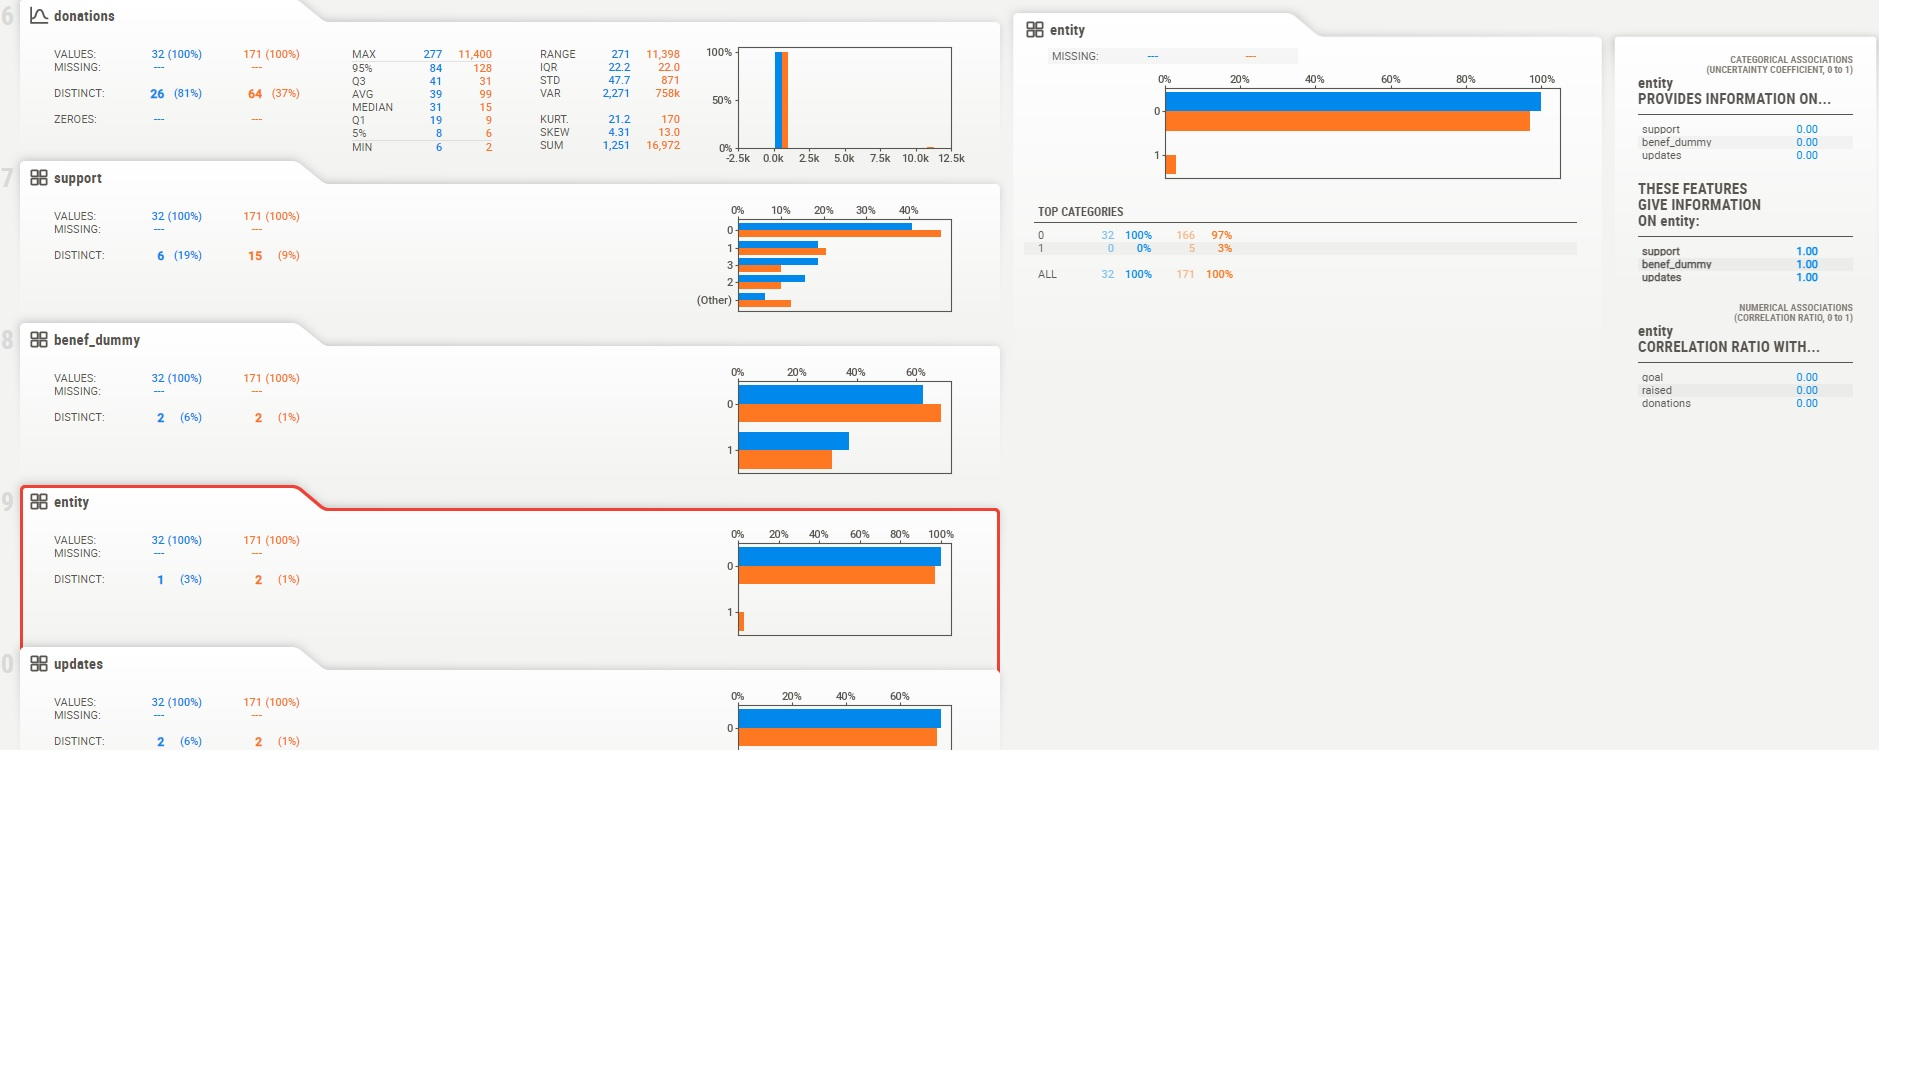

Inspecting the "beneficiary" folder more carefully, allows to notice that 8 out of 12 beneficiaries inside the successful dataframe are, in fact, charities, and this can be verified by extracting the associated campaign's title, and querying GOOGLE.

This implies that 8 out of 32 successful campaigns involve charities, yielding a 25% rate, which compared with the 5 campaigns out of 171 involving charities contained into the non successful dataframe, could lead to infer that charities constitute a factor for reaching the predefined goal, since the related percentage is 3%.

Assuming that all names which are not identifying an individual through the pattern "First name, last name" are thus representing charities, the amount of non successful campaigns involving charities raises to 36, returning a 21% rate, much closer to the 25% rate stemming from the successful dataframe, but still showing a sensible difference in rates.

In [ ]:
# show the unique values of beneficiary column within non successful campaigns as a pandas series for vertical visualization
pd.Series(df_nosucc["beneficiary"].unique())

0                                         GoFundMe.org 
1                                        No beneficiary
2                                         Paul Thurman 
3                                         Nikita Smith 
4                        Flying Deer Nature Center Inc 
5                                             OneWhale 
6                                River Ridge Institute 
7              Treasure Coast Manatee Foundation, Inc. 
8                              Friends of Haiku Stairs 
9                              Square Lake Association 
10                                 Wasteless Solutions 
11                 Madrean Archipelago Wildlife Center 
12                                      Christine Wynn 
13                                      Elizabeth Wolz 
14                                          vetpaw.org 
15                   Alliance for the Wild Rockies Inc 
16                               Dharmadatta Community 
17                                 World Wildlif

It is possible to observe how the average goal is much smaller for the successful campaigns, compared to the not successful one's, according to the filter I have set above, namely 3550.65 as opposed to 31700.27, values which are visible in the "goal" folder of the EDA comparison report.

This is in line with my assumption that it is easier to accomplish a smaller goal, and if this is used as the main proxy for fundraising success, then the campaign will be labelled successful, although the presence of the outlier fundraising at index 1 in the main dataframe, associated with a goal of 1000000, surely plays a role in pushing the unsuccessful mean upwards.
<br><br><br>

**Which language features in the campaign’s title is associated with
success? Discuss the role of length, tone, special words/emojis,
topical language, etc.**

A remark about emojis, probably due to the limited amount of data, none were found in title and description columns, as the code below highlights.

In [ ]:
# install needed library for emoji detection
!pip install emoji

In [ ]:
# import the needed library
import emoji

# scan for emojis in titles
emoji_series_t = df["title"].apply(lambda x: emoji.distinct_emoji_list(x))

if all(len(x) == 0 for x in emoji_series_t):
  print("No emojis")
else:
  print("Emojis found")

# scan for emojis in descriptions
emoji_series_d = df["description"].apply(lambda x: emoji.distinct_emoji_list(x))

if all(len(x) == 0 for x in emoji_series_t):
  print("No emojis")
else:
  print("Emojis found")

The first feature, title length, is directly mentioned by GoFundMe's staff as a factor impacting on campaign success; for this reason, in the snippet below I compare the campaigns whose titles are ranging between 4 and 8 words, with those whose titles are outside this range.

This is not done using NLTK to tokenize the titles, because symbols such as "!" would be counted as a single word; this approach is followed below for sentiment analysis anyways.

In [ ]:
# create dataframe with less columns for easier interpretation and increased readability
title_df = pd.DataFrame({"title": df["title"], "goal": df["goal"], "raised": df["raised"]})

# create new column with the title length for each row
title_df["length"] = title_df["title"].apply(lambda x: len(re.findall("\w+", x)))

# calculate percentage of goal reached by raising money
title_df["perc"] = title_df["raised"] / title_df["goal"]

# filter the new dataframe for fundraisers with the desirable title length
title_df_cond = title_df[(title_df["length"] >= 4) & (title_df["length"] <= 8)]

# filter the new dataframe with the remaining fundraisers
title_df_nocond = title_df[~((title_df["length"] >= 4) & (title_df["length"] <= 8))]

# compare percentage of campaigns having reached the success conditions, with percentage of campaigns not having reached it
print((title_df_cond["perc"] >= .8).sum() / len(title_df_cond))
print((title_df_nocond["perc"] >= .8).sum() / len(title_df_nocond))

0.16770186335403728
0.11904761904761904


The percentage of campaigns having reached the success condition, namely having raised at least 80% of the predefined goal, within the dataframe containing campaigns whose titles are ranging between 4 and 8 words, is sensibly larger (17%), compared to that of the dataframe containing fundraisers having titles with less than 4 or more than 8 words (12%), showing how the advice provided by the website staff is indeed valuable.

A sentiment analysis is necessary to discriminate between different tones, and after carrying it out as shown below it is then possible to calculate the percentage of successful campaigns using a certain tone, and compare it with the results from fundraisers applying other ones.

To do this, I initially use a lexicon based approach, namely I import a dictionary containing words which have already been classified as belonging to a certain category, and I focus my classification onto 6 of the available ones, namely positive, negative, strong, weak, active and passive.

I then repeat the analysis using the pre trained model DISTILBERT, recognizing different emotions, namely sadness, joy, love, anger, fear and surprise, provided within the TRANSFORMERS library, to finally compare results.

In [ ]:
# install needed library to carry out sentiment analysis
!pip install nltk

In [ ]:
# import needed library
import nltk

# download additional material for tokenizing strings
nltk.download("punkt")
#from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# define helper function to apply on dataframe which returns the sentiment category associated with the maximum score, or labels the string as "Neutral" if no score can be computed
def max_sent(string):
  sent_dct = pd.read_csv("/content/gdrive/My Drive/projects/dafa/HarvardGI4.txt", delimiter='\t',low_memory=False)
  cat_freq_dct = {"Positiv": 0, "Negativ": 0, "Strong": 0, "Weak": 0, "Active": 0, "Passive": 0}

  for cat in cat_freq_dct.keys():
    sent_lst = list(sent_dct[~sent_dct[cat].isna()]['Entry'].apply(lambda x: x.lower()))

    length = len(nltk.word_tokenize(string))

    for term in sent_lst:
      cat_freq_dct[cat] += string.lower().count(term)

    cat_freq_dct[cat] = cat_freq_dct[cat] / length

  for cat, freq in cat_freq_dct.items():
    if all(x == 0 for x in cat_freq_dct.values()):
      max_cat = "Neutral"
    elif freq == max(cat_freq_dct.values()):
      max_cat = cat

  return max_cat

In [ ]:
# apply helper function to title column
title_df["sent"] = title_df["title"].apply(lambda x: max_sent(x))

In [ ]:
# create and fill dictionary to compute percentage of successful campaigns within each sentiment category
cat_perc_dct = dict.fromkeys(title_df["sent"].unique())
for string in cat_perc_dct.keys():
  cat_perc_dct[string] = len(title_df[(title_df["raised"] / title_df["goal"] >= .8) & (title_df["sent"] == string)]) / len(title_df[title_df["sent"] == string])

cat_perc_dct

{'Neutral': 0.14814814814814814,
 'Active': 0.06060606060606061,
 'Negativ': 0.3,
 'Strong': 0.13953488372093023,
 'Weak': 0.4,
 'Positiv': 0.17142857142857143,
 'Passive': 0.21739130434782608}

In [ ]:
# install needed library to carry out sentiment analysis
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 58.2 MB/s eta 0:00:00


In [ ]:
# import needed library and set up the model
from transformers import pipeline
sentiment_pipeline = pipeline(model = 'bhadresh-savani/distilbert-base-uncased-emotion', truncation = True)

In [ ]:
# carry out the classification, outputting a list
title_sent_ml = sentiment_pipeline(list(title_df["title"]))

In [ ]:
# transfer the labels provided by the classification to the dataframe
title_df["sent_ml"] = ""
for row in range(len(title_df["sent_ml"])):
  title_df["sent_ml"][row] = title_sent_ml[row]["label"]

<ipython-input-42-df79ce82cc3f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_df["sent_ml"][row] = sent_ml[row]["label"]


In [ ]:
# create and fill dictionary to compute percentage of successful campaigns within each sentiment category
title_ml_dct = dict.fromkeys(title_df["sent_ml"].unique())
for string in title_ml_dct.keys():
  title_ml_dct[string] = len(title_df[(title_df["raised"] / title_df["goal"] >= .8) & (title_df["sent_ml"] == string)]) / len(title_df[title_df["sent_ml"] == string])

title_ml_dct

{'joy': 0.15217391304347827,
 'anger': 0.07407407407407407,
 'sadness': 0.29411764705882354,
 'fear': 0.19047619047619047}

The results suggest that titles whose words recall negativity or weakness are more successful, in relative terms, than those recalling other semantic dimensions such as passiveness or positiveness; the newly computed percentages must be interpreted carefully due to the limited sample size, which leads to having only 10 campaign titles labelled as negative and 5 as weak, implying that a low absolute value of successful campaigns can lead to high relative values.

The machine learning approach returns "sadness" as the most successful category, but the same drawbacks apply here, since only 17 campaigns are originally labelled as having a "sad" title, of which 5 are successful according to the predefined criterion, albeit this time 2 categories are left out completetly, thus the sample sizes are slightly larger compared to the lexicon based ones.

Finally, a word cloud is displayed below to intuitively represent the most commonly found words within the titles.

In [ ]:
# append all titles to a list as separate words
words_title_lst = []
for string in df["title"]:
  for word in re.findall("\w+", string):
    #if word not in words_title_lst:
    words_title_lst.append(word.lower())

# concatenate all words forming titles into a single string
words_title = " ".join(words_title_lst)

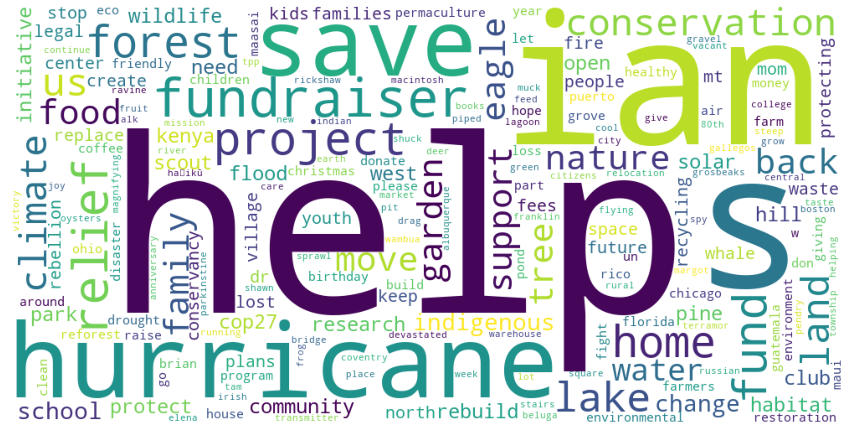

In [ ]:
# import needed libraries for graphical display
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# generate the word cloud
wordcloud = WordCloud(width = 1000, height = 500, background_color='white',collocations = False).generate(words_title)

# display the word cloud
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Do the same regarding the campaign’s full description.**

As outlined above, it is suggested that fundraisers provide a description going beyond the 400 words mark in order to boost success by increasing the amount of donations per campaign.

I follow the same approach from above to test whether this is sound advice, according to the code which is available below.

In [6]:
from scipy import stats

# create dataframe with less columns for easier interpretation and increased readability
desc_df = pd.DataFrame({"description": df["description"], "goal": df["goal"], "raised": df["raised"], "donors": df["donations"]})

# create new column with the description length for each row
desc_df["length"] = desc_df["description"].apply(lambda x: len(re.findall("\w+", x)))

# filter the new dataframe for fundraisers with the desirable description length
desc_df_cond = desc_df[desc_df["length"] > 400]

# filter the new dataframe with the remaining fundraisers
desc_df_nocond = desc_df[~desc_df["length"] <= 400]

# compare average amount of donations per campaign between the two filtered dataframes
print(desc_df_cond["donors"].mean())
print(desc_df_nocond["donors"].mean())

# compare trimmed average amount of donations per campaign between the two filtered dataframes, to remove outliers' impact
print(stats.trim_mean(desc_df_cond["donors"], .05))
print(stats.trim_mean(desc_df_nocond["donors"], .05))

327.15
89.76847290640394
33.611111111111114
25.808743169398905


As it is possible to observe, the advice provided by the staff is indeed sound, because, even if accounting for outliers dramatically decreases the difference, the average amount of donations is sensibly larger for the campaigns whose description surpasses the 400 words mark.

The same sentiment analysis already performed for campaign titles is now carried out for their descriptions, allowing to compare results, according to the code below.

In [ ]:
# apply helper function to description column
desc_df["sent"] = desc_df["description"].apply(lambda x: max_sent(x))

In [ ]:
# create and fill dictionary to compute percentage of successful campaigns within each sentiment category
sent_desc_dct = dict.fromkeys(desc_df["sent"].unique())
for string in sent_desc_dct.keys():
  sent_desc_dct[string] = len(desc_df[(desc_df["raised"] / desc_df["goal"] >= .8) & (desc_df["sent"] == string)]) / len(desc_df[desc_df["sent"] == string])

sent_desc_dct

{'Passive': 0.5,
 'Strong': 0.16363636363636364,
 'Active': 0.0625,
 'Positiv': 0.16666666666666666,
 'Weak': 0.5,
 'Negativ': 0.2222222222222222}

In [ ]:
# carry out the classification, outputting a list
sent_ml = sentiment_pipeline(list(desc_df["description"]))

In [ ]:
# transfer the labels provided by the classification to the dataframe
desc_df["sent_ml"] = ""
for row in range(len(desc_df["sent_ml"])):
  desc_df["sent_ml"][row] = sent_ml[row]["label"]

<ipython-input-59-6a6b349cab4d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desc_df["sent_ml"][row] = sent_ml[row]["label"]


In [ ]:
# create and fill dictionary to compute percentage of successful campaigns within each sentiment category
ml_sent_dct = dict.fromkeys(desc_df["sent_ml"].unique())
for string in ml_sent_dct.keys():
  ml_sent_dct[string] = len(desc_df[(desc_df["raised"] / desc_df["goal"] >= .8) & (desc_df["sent_ml"] == string)]) / len(desc_df[desc_df["sent_ml"] == string])

ml_sent_dct

{'fear': 0.25,
 'joy': 0.15942028985507245,
 'sadness': 0.21428571428571427,
 'anger': 0.10526315789473684,
 'surprise': 0.0,
 'love': 0.0}

The newly obtained results, which are arguably more robust than the ones derived from the title column above, because they are the output of much longer strings, indicate that the "strong" category is dominating the campaigns' descriptions, albeit associated with a lower success rate (close to the overall success rate of the unfiltered dataset), than the other ones.

A remark to be stated is that the most successful categories are the smallest ones; 1 out of 2 campaigns labelled as "weak" is successful, yielding a 50% rate, and the same holds for the "passive" group.

This is partially in contrast with the results obtained by the analysis carried out on the title column, but still not reliable as the sample size is too small to infer meaningful conclusions.

It's still worth noting that the machine learning approach classifies fearful and sad descriptions as the most successful ones, and it is not a stretch to assume that fear and sadness can be related to weakness and passiveness, categories stemming from the lexicon based analysis, implying that, despite the sample size, both approaches can be thought as reaching the same results.

Finally, a word cloud is displayed below to intuitively represent the most commonly found words within the descriptions.

In [ ]:
# append all titles to a list as separate words
words_desc_lst = []
for string in df["description"]:
  for word in re.findall("\w+", string):
    #if word not in words_desc_lst:
    words_desc_lst.append(word.lower())

# concatenate all words forming titles into a single string
words_desc = " ".join(words_desc_lst)

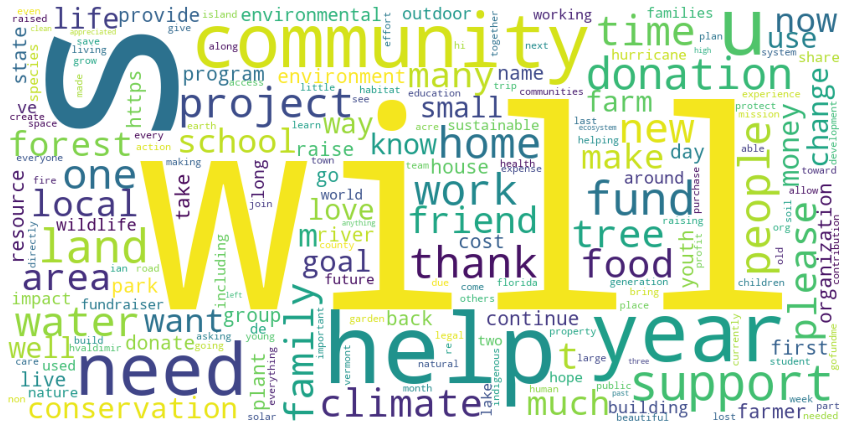

In [ ]:
# generate the word cloud
wordcloud = WordCloud(width = 1000, height = 500, background_color='white',collocations = False).generate(words_desc)

# display the word cloud
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Are there any associations between the “words of support” and the donation amount?**

To answer this question, it is necessary to state that associations between words of support and donation amount could be intended in at least two ways:

*   Within a campaign, there is an association if people who wrote words of support donated, on average, differently than people who didn't;
*   Among different campaigns, there is an association if campaigns with more words of support raised more or less money, on average, than campaigns with less words of support

The rationale behind such associations, leading to a direct relation between words of support and donation amount, is quite simple and intuitive:
*   People who write words of support acquire more visibility than people who only donated, and whose donations can be visible for sure only by clicking on the "see all" button from the fundraiser's main page;
*   People who write words of support could also be more emotionally involved in the campaign, compared to people who haven't written any comment, and this could be associated with a greater average donation amount;
*   People who read words of support when first browsing a campaign could be persuaded by such comments to donate, led by some sort of "herd behavior", implying such campaigns would be more successful in terms of raised amount;
*   Thus, campaigns with more words of support could be more successful, at least in terms of raised amount, than campaigns with less or no words of support

To test this logic, I use the data collected with a separate script, attached to the zipped folder for reference, stemming from one campaign having a fair amount of words of support; the code is anyways posted below.

Due to the same duplicates/blank entries problem characterizing the additional donation analysis described in the drawbacks section, I only carry this out for one campaign, as an example.

Since I tailored the code for this specific campaign, it shouldn't be used for removing duplicates and blank entries, or for loading more words of support within the page for other fundraisers.

In [ ]:
# import needed libraries
import time

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select

import pandas as pd

# set driver options and read URLs data
opts = webdriver.ChromeOptions()
opts.add_argument("start-maximized")

href_df = pd.read_csv(r"F:\Università\goethe\sem3\data\case\scrape\href_df.csv")

# open driver and get root URL
driver = webdriver.Chrome(service = Service(r"F:\Università\goethe\sem3\data\chromedriver.exe"),
                          options = opts)

driver.get("https://www.gofundme.com/discover/environment-fundraiser")

# click on accept cookies button
driver.find_element(by = By.ID, value = "onetrust-accept-btn-handler").click()

# click on change language flag icon
driver.find_element(by = By.CSS_SELECTOR,
                    value = ".footer-locale-picker-flag.norma-icon.norma-icon--circle.mr").click()

# select english from drop down menu within change language page; this automatically sets
# country to US, so no additional selection is needed to change the country, even if initially it's
# set to Germany
Select(driver.find_element(by = By.ID,
                           value = "localePickerLanguage")).select_by_value("en")

# click on save changes button
driver.find_element(by = By.CSS_SELECTOR,
                    value = ".js-locale-picker-save.button.primary.text-bold").click()

# get campaign's URL from csv data
driver.get(href_df["0"][2])

# click on read more button if available
try:
    driver.find_element(by = By.CSS_SELECTOR, value = ".hrt-text-button.hrt-text-button--gray-dark").click()
    time.sleep(2)
except:
    pass

# scroll to page bottom
window_size = driver.get_window_size()["height"]
window_size = int(window_size / 4)
time.sleep(2)

page_height = driver.execute_script("return document.body.scrollHeight")
time.sleep(2)

for i in range(round(page_height/window_size) + 1):
    driver.execute_script("window.scrollBy(0," + str(window_size) + ");")
    time.sleep(.5)

# click on show more button to expose 10 additional comments (1 as 10 comments shown already, loading 10 per time yields 20 comments,
# so covers all 19 available at the time of script execution)
driver.find_element(by = By.XPATH,
                    value = "//button[@class='mt3x hrt-secondary-button hrt-secondary-button--green hrt-secondary-button--full-for-small hrt-secondary-button--medium hrt-base-button']").click()
time.sleep(2)

# extract words of support donation amounts
supp_elems = driver.find_elements(by = By.XPATH,
                                  value = "//div[@class='m-donation-and-time']")

supp_don_lst = []
for elem in supp_elems:
    supp_don_lst.append(int(re.findall("\d+", elem.text)[0]))

# click on see all button and scroll to donation list bottom
driver.find_element(by = By.CSS_SELECTOR,
                         value = ".mt2x.hrt-secondary-button.hrt-secondary-button--green.hrt-secondary-button--inline.hrt-secondary-button--small.hrt-base-button").click()
time.sleep(2)

# scroll to donation list bottom
scrollable_popup = driver.find_element(By.XPATH, value = "//div[@class='o-modal-donations-content']")
for i in range(10):
    driver.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", scrollable_popup)
    time.sleep(.5)

# extract donation amounts from donation list elements
don_elems = driver.find_elements(by = By.XPATH, value = "//ul[@class='m-donation-meta list-unstyled m-meta-list m-meta-list--bullet']")

don_lst = []
for elem in don_elems:
    don_lst.append(elem.text.partition("\n")[0])

# remove duplicates and blank entries from previous list
don_lst = [i for i in don_lst if i]

don_lst = don_lst[0:196]

# turn the list into an integer list after replacing characters which prevent it
for w in range(len(don_lst)):
    don_lst[w] = int(don_lst[w].replace("$", "").replace(",", "").replace(" ", ""))

# check which and how many values to remove from main list for comparison
supp_don_dct_keys = []

for val in supp_don_lst:
    if val not in supp_don_dct_keys:
        supp_don_dct_keys.append(val)

supp_don_dct_values = []

for val in supp_don_dct_keys:
    counter = 0
    
    for i in range(len(supp_don_lst)):
        if supp_don_lst[i] == val:
            counter += 1
    supp_don_dct_values.append(counter)

supp_don_dct = {supp_don_dct_keys[i]: supp_don_dct_values[i] for i in range(len(supp_don_dct_keys))}

# define helper function to remove values exact amount of times
def rem_n_vals(lst, dizio):
    for val in dizio.keys():
        for i in range(dizio[val]):
            lst.remove(val)
    
    return lst

# remove donations linked to words of support from main list for average comparison
don_lst_rem = don_lst.copy()

don_lst_rem = rem_n_vals(don_lst_rem, supp_don_dct)

# compare averages to show which one is larger
print(pd.Series(don_lst_rem).mean())
print(pd.Series(supp_don_lst).mean())

# close driver
driver.close()

The averages amount respectively to 50.12 for the donors who haven't written any words of support, and to 68.42 for those who have, showing that on average people writing words of support tend to donate more.

An important remark to make is that for these conclusions to be robust, the same process should be repeated for the other available fundraisers, and that the difference is also caused by a mechanic reason, namely the average computed for people having written words of support has a much smaller (19) denominator compared to the one (196 - 19 = 177) characterizing the overall donors who didn't write any comment.

It is reasonable to think that the impact of this last factor may be of considerable size for every other campaign, since a small fraction of people write words of support relative to the overall amount of donors.

To test the reasoning using aggregate measures, instead of showcasing the results for an individual fundraiser as done above, I filter the dataframes according to the presence of words of support and calculate the trimmed average raised amount, as shown by the code below.

In [ ]:
supp_df = df[df["support"] > 0]

nosupp_df = df[df["support"] == 0]

print(stats.trim_mean(supp_df["raised"], .05))
print(stats.trim_mean(nosupp_df["raised"], .05))

3536.59595959596
1338.2790697674418


The result, obtained from two dataframes of similar size, since both are around 100 rows, suggests that campaigns with at least one word of support have a larger average raised amount compared with those without words of support, and in this particular example the difference is definitely wide.

Running a basic OLS regression with the raised amount expressed in thousands seems to confirm a direct, positive relationship between the two variables, as displayed below.



In [ ]:
# import needed library for regression
import statsmodels.api as sm

# add constant to words of support vector
supp_cons = sm.add_constant(df["support"])

# fit the model and print the output, not robust
model = sm.OLS(df["raised"] / 1000, supp_cons)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 raised   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     1947.
Date:                Tue, 03 Jan 2023   Prob (F-statistic):          2.32e-105
Time:                        17:50:16   Log-Likelihood:                -747.48
No. Observations:                 203   AIC:                             1499.
Df Residuals:                     201   BIC:                             1506.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9512      0.682      4.328      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


However, when accounting for heteroskedasticity, which is plausibly occurring because campaigns with a much larger goal can potentially raise much more money, the coefficient associated with support stops being significant, which decreases the overall robustness of the conclusions inferred above.

In [ ]:
# add constant to words of support vector
supp_cons = sm.add_constant(df["support"])

# fit the model with raised amount and print the output, robust
model = sm.OLS(df["raised"] / 1000, supp_cons)
results = model.fit(cov_type = "HC3")
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 raised   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     1.304
Date:                Tue, 03 Jan 2023   Prob (F-statistic):              0.255
Time:                        17:54:20   Log-Likelihood:                -747.48
No. Observations:                 203   AIC:                             1499.
Df Residuals:                     201   BIC:                             1506.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9512      1.158      2.548      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Another regression is attempted below, this time accounting for other collected information from the main dataframe, yielding poor results in terms of coefficient's significance, and in terms of multicollinearity, issue which was already visible from the EDA report, within the associations folder for the dataframe, that showed the correlation matrix for the various features.

In this case the goal column is also divided by 1000 for better readability, along with the raised one, and the coefficients are expected to be positive for all independent variables except for goal, which could be either positive or negative.

In [ ]:
# drop columns which do not play a role into regression analysis
X = df.drop(columns = ["creation", "title", "description", "organizer", "location", "beneficiary", "raised", "benef_dummy", "entity"])
X["goal"] = X["goal"] / 1000

# perform the multivariate regression
model = sm.OLS(df["raised"] / 1000, X, hasconst = False)
results = model.fit(cov_type = "HC3")
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 raised   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              20.66
Date:                Tue, 03 Jan 2023   Prob (F-statistic):                    2.98e-14
Time:                        18:03:34   Log-Likelihood:                         -662.57
No. Observations:                 203   AIC:                                      1333.
Df Residuals:                     199   BIC:                                      1346.
Df Model:                           4                                                  
Covariance Type:                  HC3                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In particular, the only significant coefficient is associated with the goal variable, while all the others are highly not significant, as signalled by the large connected p values.

#Previous attempts

Some of the codes I've previously attempted are listed here as further reference.

In [ ]:
# used url https://www.gofundme.com/discover/environment-fundraiser and
# https://www.gofundme.com/f/giving-season-for-wildlife?qid=46cf4a13d99c25ed6e0f0485adcc0c25 to begin trying out scraping, not succeeding as shown below;
# tried to read response.json() and got "Expecting value" error, reading online this is often related to having "jsonline" and not json;
# tried to run the lines:
"""from requests_html import HTMLSession

session = AsyncHTMLSession()

r = session.get('https://www.gofundme.com/discover/environment-fundraiser')

r.html.render()"""
# after pip install requests_html, got the error "Cannot use HTMLSession within an existing event loop. Use AsyncHTMLSession instead.";
# i think it's better to try and use selenium since i guess the website relies on javascript, and requests module doesn't work well with it?
# UPDATE: seems like beautifulsoup is enough for now to recover text information from the aforementioned urls
# UPDATE: still preferred to use selenium driver to mimic my activity on the browser, to extract needed information